Author: Luca Pappalardo
</br>Geospatial Analytics, Master degree in Data Science and Business Informatics, University of Pisa

# Geospatial Analytics - Lesson 3: Spatial and Mobility data

In this lesson, we will learn how to handle and explore spatial data in Python using folium and scikit-mobility.

1. [Exploring datasets](#exploring)
2. [GPS traces](#gpstraces)
3. [Geotagged posts](#geotaggedposts)
4. [Road Networks and OSMnx](#roadnetworks)
    - [Get administrative boundaries](#getboundaries)
    - [Download road networks](#downloadnetworks)
    - [Analyze road networks](#analyzenetworks)
5. [Points of Interest and Geospatial entities](#pois)

<a id="exploring"></a>
# Exploring datasets in scikit-mobility

One of the use cases for [*scikit-mobility*](https://github.com/scikit-mobility/scikit-mobility) is the exploratory data analysis of mobility datasets, which includes the visualization of trajectories and flows. 

To this end, both `TrajDataFrame` and `FlowDataFrame` have methods that allow the user to produce interactive visualizations generated using [*folium*](https://python-visualization.github.io/folium/). 

## Visualizing trajectories

A `TrajDataFrame` has three main plotting methods: 
- `plot_trajectory` plots a line connecting the trajectory points on a map;
- `plot_stops` plots the location of stops on a map; 
- `plot_diary` plots the sequence of visited locations over time.

### Plot trajectories

Method `plot_trajectory` plots the time-ordered trajectory points connected by straight lines on a map. 

If the column `uid`is present and contains more than one object, the trajectory points are first grouped by `uid` and then sorted by `datetime`.

Large `TrajDataFrame`s with many points can be computationally intensive to visualize. Two arguments can be used to reduce the amount of data to plot:
- `max_users` limits the number of objects whose trajectories should be plotted
- `max_points` limits the number of trajectory points per object to plot, i.e., if necessary an object's trajectory will be down-sampled and at most `max_points` points will be plotted.

The plot style can be customized via arguments to specify the color, weight, and opacity of the trajectory lines, as well as the type of map tiles to use. 
The user can also plot markers denoting the start points and the end points of the trajectory. 

The `plot_trajectory` method, as well as all the other plotting methods, return a `folium.Map` object, which can be used by other `folium` and scikit-mobility functions to visualize additional data on the same map. A `folium.Map` object can be passed to a plotting method via the argument `map_f`. If `map_f` is `None`, the trajectories are plotted on a new map.


In [1]:
# import the library
import skmob
import pandas as pd

In [2]:
skmob.__version__

'1.3.1'

In [9]:
# From a list
data_list = [[1, 39.984044, 116.319236, '2008-10-23 13:53:05'],
             [1, 39.984198, 116.319322, '2008-10-23 13:53:06'],
             [1, 39.974224, 116.319402, '2008-10-23 13:53:11'],
             [1, 39.974211, 116.219389, '2008-10-23 13:53:16']]

In [10]:
tdf = skmob.TrajDataFrame(data_list, user_id=0, latitude=1, longitude=2, datetime=3)
tdf

uid        lat         lng            datetime
0    1  39.984044  116.319236 2008-10-23 13:53:05
1    1  39.984198  116.319322 2008-10-23 13:53:06
2    1  39.974224  116.319402 2008-10-23 13:53:11
3    1  39.974211  116.219389 2008-10-23 13:53:16

In [12]:
map_f = tdf.plot_trajectory(zoom=12, start_end_markers=False, hex_color='red')
map_f

/Users/lucapappalardo/opt/anaconda3/envs/GSA/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/Users/lucapappalardo/opt/anaconda3/envs/GSA/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


<a id='gpstraces'></a>
## GPS traces

In [13]:
# create a TrajDataFrame from a dataset of GPS traces
url = "https://github.com/scikit-mobility/tutorials/raw/master/mda_masterbd2020/data/geolife_sample.txt.gz"
tdf = skmob.TrajDataFrame.from_file(url)
print(type(tdf))
tdf.head()

<class 'skmob.core.trajectorydataframe.TrajDataFrame'>


lat         lng            datetime  uid
0  39.984094  116.319236 2008-10-23 05:53:05    1
1  39.984198  116.319322 2008-10-23 05:53:06    1
2  39.984224  116.319402 2008-10-23 05:53:11    1
3  39.984211  116.319389 2008-10-23 05:53:16    1
4  39.984217  116.319422 2008-10-23 05:53:21    1

In [14]:
tdf.uid.unique()

array([1, 5])

In [15]:
map_f = tdf.plot_trajectory(zoom=12, max_users=2) #hex_color='#000000')
map_f

/Users/lucapappalardo/opt/anaconda3/envs/GSA/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


NOTE: if trajectories represent abstract mobility, such as movements extracted from social media posts or mobile phone records, straight lines may appear that do not consider walls, buildings, and similar structures on the road network. 

## Geotagged traces

In [16]:
url = 'https://snap.stanford.edu/data/loc-brightkite_totalCheckins.txt.gz'
df = pd.read_csv(url, sep = '\t', header = 0, nrows = 100000, 
                 names = ['user', 'check-in_time', 'latitude', 'longitude', 'location id'])
tdf_ci = skmob.TrajDataFrame(df, latitude = 'latitude', longitude = 'longitude', 
                          datetime = 'check-in_time', user_id = 'user').sort_values(by = 'datetime')

In [17]:
tdf_ci.head()

uid                  datetime        lat         lng  \
15410   12 2008-03-22 05:01:29+00:00  39.768753 -105.006395   
15409   12 2008-03-22 05:50:55+00:00  39.768057 -105.002983   
15408   12 2008-03-22 06:17:35+00:00  39.768057 -105.002983   
15407   12 2008-03-22 06:34:37+00:00  39.768057 -105.002983   
15406   12 2008-03-22 19:45:30+00:00  39.785486 -104.895457   

                                    location id  
15410  7b52009b64fd0a2a49e6d8a939753077792b0554  
15409  fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b  
15408  fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b  
15407  fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b  
15406  f1abd670358e036c31296e66b3b66c382ac00812

In [18]:
tdf_ci.plot_trajectory(max_users=2, start_end_markers=False, zoom=3)

/Users/lucapappalardo/opt/anaconda3/envs/GSA/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


In [22]:
ni_tdf_ci = tdf_ci[(tdf_ci['lat'] == 0.0) & (tdf_ci['lng'] == 0.0)]
ni_tdf_ci

uid                  datetime  lat  lng  \
49976   47 2008-10-16 16:57:22+00:00  0.0  0.0   
49975   47 2008-10-16 17:50:56+00:00  0.0  0.0   
49974   47 2008-10-16 17:51:07+00:00  0.0  0.0   
49973   47 2008-10-16 17:51:24+00:00  0.0  0.0   
34694   30 2009-10-06 07:17:50+00:00  0.0  0.0   
...    ...                       ...  ...  ...   
82105  146 2010-10-15 20:26:30+00:00  0.0  0.0   
82104  146 2010-10-15 21:05:04+00:00  0.0  0.0   
82103  146 2010-10-15 23:43:03+00:00  0.0  0.0   
82099  146 2010-10-16 23:59:24+00:00  0.0  0.0   
82098  146 2010-10-17 00:29:16+00:00  0.0  0.0   

                                    location id  
49976  8758bc71b1094b2ddf2d41649767aa54778a6a11  
49975  8758bc71b1094b2ddf2d41649767aa54778a6a11  
49974  8758bc71b1094b2ddf2d41649767aa54778a6a11  
49973  8758bc71b1094b2ddf2d41649767aa54778a6a11  
34694          00000000000000000000000000000000  
...                                         ...  
82105          00000000000000000000000000000000  
82104          00000000000000000000000000000000  
82103          00000000000000000000000000000000  
82099          00000000000000000000000000000000  
82098          00000000000000000000000000000000  

[975 rows x 5 columns]

## Visualizing flows

A `FlowDataFrame` has two main plotting methods:
- `plot_tessellation` plots the tessellation's tiles on a geographic map;
- `plot_flows` plots, on a geographic map, the lines connecting the centroids of the tessellation's tiles between which flows are present.

### Plot tessellation

Method `plot_tessellation` plots the `GeoDataFrame` associated with a `FlowDataFrame` on a geographic map. 

Large tessellations with many tiles can be computationally intensive to visualize. The argument `maxitems` can be used to limit the number of tiles to plot (default: -1, which means that all tiles are displayed).

The plot style can be customized via arguments to specify the color, opacity of the tiles, and the type of map tiles to use. The argument `popup_features` allows to enhance the plot's interactivity displaying popup windows that appear when the user clicks on a tile and includes information contained in the columns of the tessellation's `GeoDataFrame` specified in the argument's list.

In [23]:
import geopandas as gpd
from skmob import FlowDataFrame

In [24]:
url = "https://raw.githubusercontent.com/scikit-mobility/tutorials/master/mda_masterbd2020/data/NY_counties_2011.geojson"
tessellation = gpd.read_file(
    url) # load a tessellation
tessellation.head()

tile_id  population                                           geometry
0   36019       81716  POLYGON ((-74.00667 44.88602, -74.02739 44.995...
1   36101       99145  POLYGON ((-77.09975 42.27421, -77.09966 42.272...
2   36107       50872  POLYGON ((-76.25015 42.29668, -76.24914 42.302...
3   36059     1346176  POLYGON ((-73.70766 40.72783, -73.70027 40.739...
4   36011       79693  POLYGON ((-76.27907 42.78587, -76.27535 42.780...

In [25]:
from skmob.utils.plot import plot_gdf

In [26]:
plot_gdf(tessellation)

/Users/lucapappalardo/opt/anaconda3/envs/GSA/lib/python3.9/site-packages/skmob/utils/plot.py:635: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  vertices = [list(zip(*p.exterior.xy)) for p in gway]


In [27]:
url = "https://github.com/scikit-mobility/tutorials/raw/master/mda_masterbd2020/data/NY_commuting_flows_2011.csv"
# create a FlowDataFrame from a file and a tessellation
fdf = skmob.FlowDataFrame.from_file(url, tessellation=tessellation, tile_id='tile_id')
fdf.head()

flow origin destination
0  121606  36001       36001
1       5  36001       36005
2      29  36001       36007
3      11  36001       36017
4      30  36001       36019

In [28]:
fdf.plot_tessellation(popup_features=['tile_id','population'], style_func_args={'fillColor':'black', 'color':'red'})

/Users/lucapappalardo/opt/anaconda3/envs/GSA/lib/python3.9/site-packages/skmob/utils/plot.py:635: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  vertices = [list(zip(*p.exterior.xy)) for p in gway]


### Plot flows

Method `plot_flows` plots the flows on a geographic map as lines between the centroids of the tiles in the `FlowDataFrame`'s tessellation. 

Large `FlowDataFrame`s with many origin-destination pairs can be computationally intensive to visualize. The argument `min_flow` can be used to specify that only flows larger than `min_flow` should be displayed. 

The thickness of each line is a function of the flow and can be specified via the arguments `flow_weight`, `flow_exp` and `style_function`. 

The plot style can be further customized via arguments to specify the color, opacity of the flow lines, and the type of map tiles to use. 

The arguments `flow_popup` and `tile_popup` allow enhancing the plot's interactivity displaying popup windows that appear when the user clicks on a flow line or a circle in an origin location, respectively, and include information on the flow or the flows from a location.

In [29]:
fdf.plot_flows(min_flow=100)

The user can also visualize the tessellation and the flows in the same plot.

In [30]:
map_f = fdf.plot_tessellation(style_func_args={'fillColor':'blue', 'color':'blue'}) 
fdf.plot_flows(map_f=map_f, min_flow=50)

/Users/lucapappalardo/opt/anaconda3/envs/GSA/lib/python3.9/site-packages/skmob/utils/plot.py:635: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  vertices = [list(zip(*p.exterior.xy)) for p in gway]


<a id="roadnetworks"></a>
## Road Networks

[***OSMnx***](https://www.sciencedirect.com/science/article/pii/S0198971516303970) is a Python package to retrieve, model, analyze, and visualize street networks from [OpenStreetMap](https://www.openstreetmap.org/). Users can download and model walkable, drivable, or bikeable urban networks with a single line of Python code, and then easily analyze and visualize them. You can just as easily download and work with amenities/points of interest, building footprints, elevation data, street bearings/orientations, and network routing. 

In [31]:
import osmnx as ox

<a id="getboundaries"></a>
### Get administrative place boundaries and shapefiles
With OSMnx, you can download place shapes from OpenStreetMap (as geopandas `GeoDataFrame`s) in one line of Python code – and project them to UTM (zone calculated automatically) and visualize in just one more line of code:

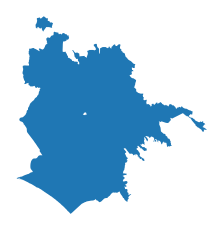

In [32]:
city = ox.geocode_to_gdf('Rome, Italy')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

You can just as easily get other place types, such as neighborhoods, boroughs, counties, states, or nations – any place geometry in OpenStreetMap:

In [33]:
place1 = ox.geocode_to_gdf('Pisa, Italy')
place2 = ox.geocode_to_gdf('Italy')
place3 = ox.geocode_to_gdf('Manhattan, New York City, New York, USA')
place4 = ox.geocode_to_gdf('Tuscany, Italy')

<AxesSubplot:>

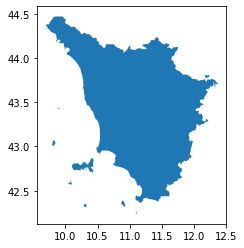

In [34]:
place4.plot()

Or you can pass multiple places into a single query to save a single shapefile or geopackage from their geometries. You can do this with cities, states, countries or any other geographic entities:

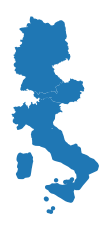

In [35]:
places = ox.geocode_to_gdf(['Italy', 'Austria', 'Germany'])
places = ox.project_gdf(places)
ax = places.plot()
_ = ax.axis('off')

<a id="downloadnetworks"></a>
### Download and model street networks

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks. The street networks are directed and preserve one-way directionality. You can download a street network by providing OSMnx any of the following:

- a bounding box
- a lat-long point plus a distance
- an address plus a distance
- a polygon of the desired street network’s boundaries
- a place name or list of place names

You can also specify several different network types:

- `drive` – get drivable public streets (but not service roads)
- `drive_service` – get drivable public streets, including service roads
- `walk` – get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
- `bike` – get all streets and paths that cyclists can use
- `all` – download all (non-private) OSM streets and paths
- `all_private` – download all OSM streets and paths, including private-access ones

#### From bounding box

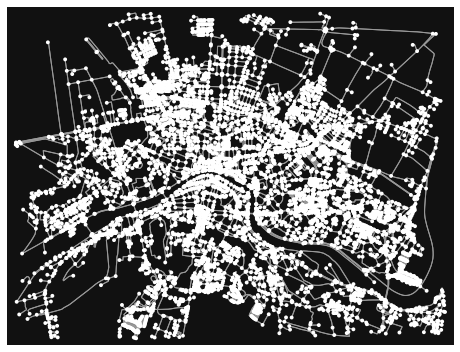

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [36]:
G = ox.graph_from_bbox(43.7400, 43.6918, 10.3601, 10.4477, network_type='walk') #'drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

To access geometries easily, we can convert the graph into a `GeoDataFrame`

In [37]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [38]:
gdf_nodes.head()

y          x          highway  street_count  \
osmid                                                           
31680788  43.709550  10.427598         crossing             4   
31770712  43.710019  10.410429  traffic_signals             3   
31770719  43.711265  10.407815              NaN             3   
31770722  43.713067  10.407784              NaN             3   
31770728  43.715400  10.402142              NaN             3   

                           geometry  
osmid                                
31680788  POINT (10.42760 43.70955)  
31770712  POINT (10.41043 43.71002)  
31770719  POINT (10.40782 43.71127)  
31770722  POINT (10.40778 43.71307)  
31770728  POINT (10.40214 43.71540)

<AxesSubplot:>

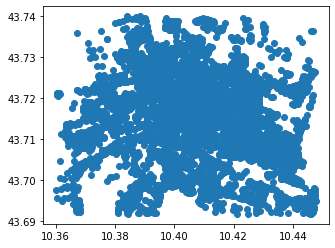

In [39]:
gdf_nodes.plot()

In [40]:
gdf_edges.head()

osmid    highway  oneway reversed  length lanes  \
u        v          key                                                        
31680788 3642089583 0    359508133    footway   False    False   9.457   NaN   
         5109569311 0    359508133    footway   False     True   6.708   NaN   
         7248019354 0     20835131  secondary   False    False  93.291     2   
         1461597786 0     20835131  secondary   False     True  16.244     2   
31770712 774990261  0    303806090  secondary   False     True  28.602   NaN   

                                          name maxspeed  \
u        v          key                                   
31680788 3642089583 0                      NaN      NaN   
         5109569311 0                      NaN      NaN   
         7248019354 0            Via Cisanello       50   
         1461597786 0            Via Cisanello       50   
31770712 774990261  0    Via Giacomo Matteotti      NaN   

                                                                  geometry  \
u        v          key                                                      
31680788 3642089583 0    LINESTRING (10.42760 43.70955, 10.42755 43.70947)   
         5109569311 0    LINESTRING (10.42760 43.70955, 10.42763 43.70960)   
         7248019354 0    LINESTRING (10.42760 43.70955, 10.42707 43.709...   
         1461597786 0    LINESTRING (10.42760 43.70955, 10.42762 43.709...   
31770712 774990261  0    LINESTRING (10.41043 43.71002, 10.41050 43.709...   

                        junction tunnel bridge width service access  ref area  
u        v          key                                                        
31680788 3642089583 0        NaN    NaN    NaN   NaN     NaN    NaN  NaN  NaN  
         5109569311 0        NaN    NaN    NaN   NaN     NaN    NaN  NaN  NaN  
         7248019354 0        NaN    NaN    NaN   NaN     NaN    NaN  NaN  NaN  
         1461597786 0        NaN    NaN    NaN   NaN     NaN    NaN  NaN  NaN  
31770712 774990261  0        NaN    NaN    NaN   NaN     NaN    NaN  NaN  NaN

<AxesSubplot:>

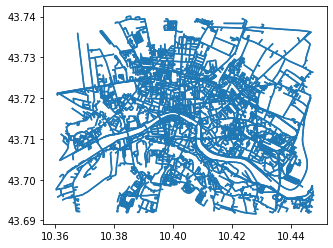

In [41]:
gdf_edges.plot()

You can create a graph from node/edge `GeoDataFrame`s, as long as `gdf_nodes` is indexed by osmid and `gdf_edges` is multi-indexed by $u$, $v$, $key$ (following normal `MultiDiGraph` structure). This allows you to load graph node/edge shapefiles or GeoPackage layers as `GeoDataFrame`s then convert to a `MultiDiGraph` for graph analytics.

In [42]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)
G2

#### From lat-long points

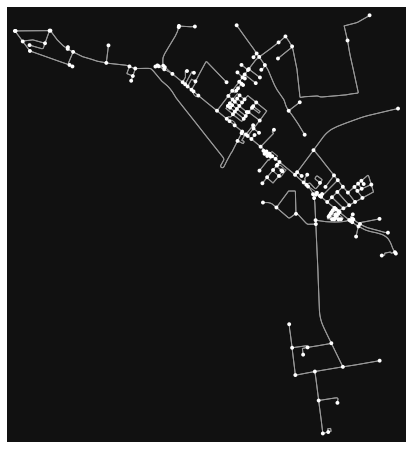

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [43]:
G = ox.graph_from_point((43.7400, 10.3601), dist=1750, network_type='all')
ox.plot_graph(G)

#### From address:

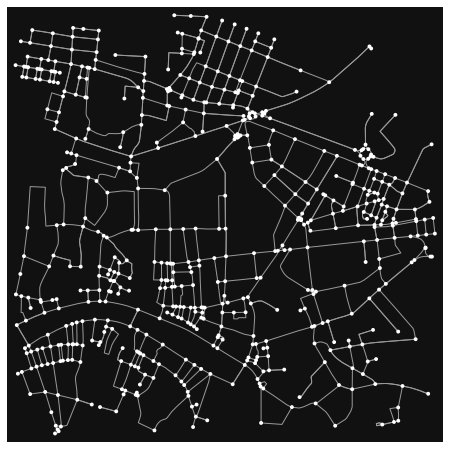

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [44]:
G = ox.graph_from_address('Largo Bruno Pontecorvo 1, Pisa, Italy', network_type='drive')
ox.plot_graph(G)

#### From Polygon

In [45]:
place1

geometry  bbox_north  bbox_south  \
0  POLYGON ((10.26846 43.67734, 10.26849 43.67724...   43.750935   43.580723   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat        lon  \
0  10.456283  10.268455  297813913  relation   42527  43.715939  10.401862   

           display_name     class            type  importance  
0  Pisa, Tuscany, Italy  boundary  administrative     0.84612

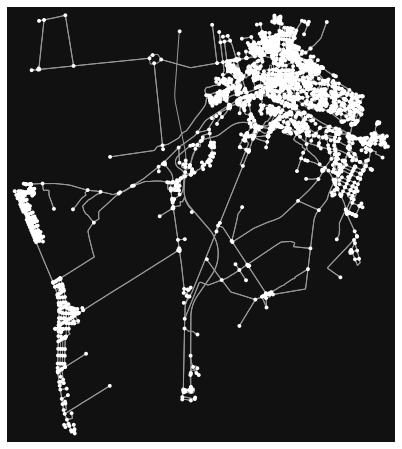

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [46]:
G = ox.graph_from_polygon(place1['geometry'].iloc[0], network_type='drive')
ox.plot_graph(G)

#### From place name

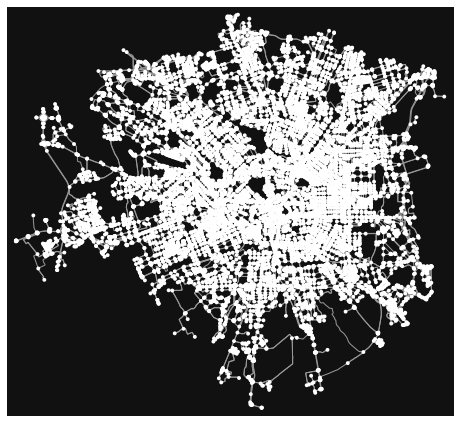

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [47]:
G = ox.graph_from_place('Milan, Italy', network_type='drive')
ox.plot_graph(G)

You can just as easily request a street network within a borough, county, state, or other geographic entity. You can also pass a list of places (such as several neighboring cities) to create a unified street network within them. This list of places can include strings and/or structured key:value place queries:

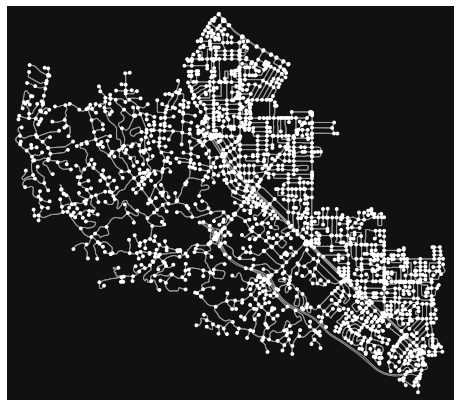

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [48]:
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

<a id="analyzenetworks"></a>
### Analyze street networks

In [49]:
# what sized area does our network cover in square meters?
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4215057.94493957

In [50]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 348,
 'm': 940,
 'k_avg': 5.402298850574713,
 'edge_length_total': 113088.97000000006,
 'edge_length_avg': 120.30741489361708,
 'streets_per_node_avg': 2.9597701149425286,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 264, 4: 47, 5: 2, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09770114942528736,
  2: 0.0,
  3: 0.7586206896551724,
  4: 0.13505747126436782,
  5: 0.005747126436781609,
  6: 0.0028735632183908046},
 'intersection_count': 314,
 'street_length_total': 58500.43000000004,
 'street_segment_count': 492,
 'street_length_avg': 118.90331300813016,
 'circuity_avg': 1.112462580352955,
 'self_loop_proportion': 0.006097560975609756,
 'clean_intersection_count': 266,
 'node_density_km': 82.56114258590321,
 'intersection_density_km': 74.49482405739542,
 'edge_density_km': 26829.754531790044,
 'street_density_km': 13878.914777490381,
 'clean_intersection_density_km': 63.10708025244326}

#### Visualize street centrality
Here we plot the street network and color its edges (streets) by their relative closeness centrality.

In [52]:
import networkx as nx

In [53]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

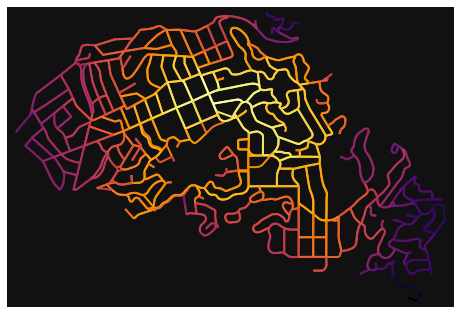

In [54]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

#### Routing

In [55]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [56]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=-122.245846, Y=37.828903)
dest = ox.distance.nearest_nodes(G, X=-122.215006, Y=37.812303)

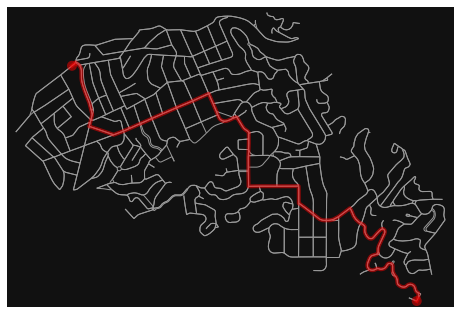

In [57]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [58]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, "length")
round(sum(edge_lengths))

4759

In [59]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle_vec(orig_y, orig_x, dest_y, dest_x))

3124

<a id="pois"></a>
## Points of Interest and Geospatial Entities
The `geometries` module of OSMnx allows downloading entities, such as grocery stores, transit stops, points of interest (POIs), or building footprints, and turn them into a `GeoDataFrame`.

To query, pass a tags dict where keys are OSM tags. The dict's values can be either:

- True to retrieve all OSM objects with this tag, regardless of its value
- a single value as a string to retrieve all OSM objects with this tag:value combination
- a list of string values to retrieve all OSM objects where this tag matches any of these values

Pass multiple dict key:value pairs to retrieve the union (not intersection) of these pairs.

See [docs](https://wiki.openstreetmap.org/wiki/Map_features).

In [60]:
# get all building footprints in some neighborhood
# `True` means retrieve any object with this tag, regardless of value
place = "Aeroporto Galileo Galilei, Pisa, Italy"
#place = 'Bunker Hill, Los Angeles, California'
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(1, 11)

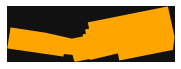

In [61]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [62]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
place = "Pisa, Italy"
tags = {"leisure": "park"}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(152, 30)

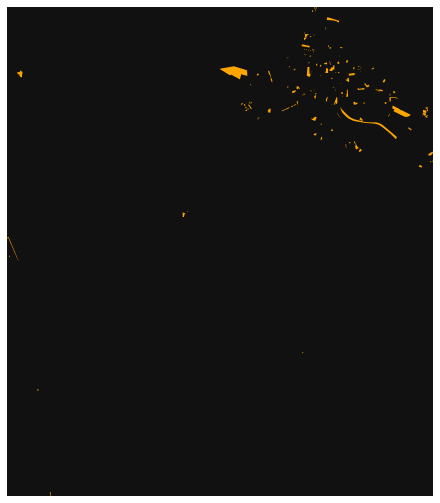

In [63]:
fig, ax = ox.plot_footprints(gdf, figsize=(9, 9))

In [64]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.geometries_from_place("Piedmont, California, USA", tags)
gdf.shape

(141, 61)

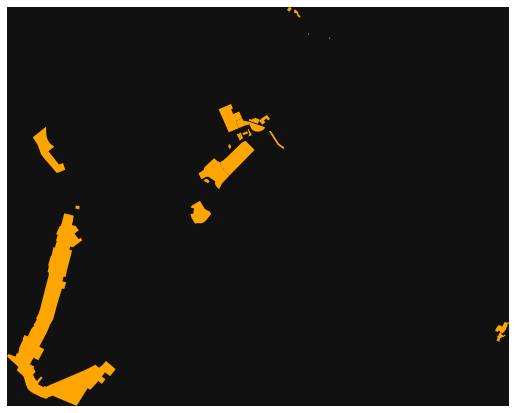

In [65]:
fig, ax = ox.plot_footprints(gdf, figsize=(9, 9))

### Example: Let's take all restaurants in Lucca

In [66]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
tags = {"building": 'supermarket'}
gdf = ox.geometries_from_place('Lucca, Italy', tags)
gdf.shape

(3, 10)

In [67]:
gdf.head()

nodes  \
element_type osmid                                                          
way          159244265  [1713360321, 1713360197, 1713360124, 364563816...   
             369134743  [3729500013, 3729506434, 3729500023, 372950642...   
             397606141  [4003913446, 4003913440, 4003913442, 400391344...   

                           building  check_date                    name  \
element_type osmid                                                        
way          159244265  supermarket  2022-09-03  Esselunga dell'Arancio   
             369134743  supermarket         NaN                     NaN   
             397606141  supermarket         NaN                    Coop   

                       payment:mastercard payment:visa         shop  \
element_type osmid                                                    
way          159244265                yes          yes  supermarket   
             369134743                NaN          NaN          NaN   
             397606141                NaN          NaN  supermarket   

                       toilets:wheelchair wheelchair  \
element_type osmid                                     
way          159244265                yes        yes   
             369134743                NaN        NaN   
             397606141                NaN        NaN   

                                                                 geometry  
element_type osmid                                                         
way          159244265  POLYGON ((10.52615 43.84889, 10.52613 43.84871...  
             369134743  POLYGON ((10.49934 43.84902, 10.49949 43.84859...  
             397606141  POLYGON ((10.52957 43.84147, 10.52947 43.84088...

<AxesSubplot:>

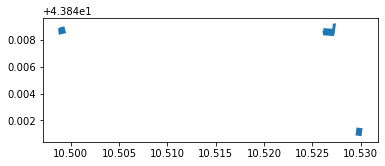

In [68]:
gdf.plot()

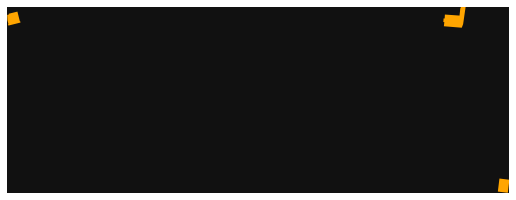

In [69]:
fig, ax = ox.plot_footprints(gdf, figsize=(9, 9))